Total hits before filtering: 140
Total hits after filtering: 106

Top 20 virus distribution:
virus_clean
Bat astrovirus Tm/Guangxi/LD38/2007    15
Shanbavirus A                           9
Mamastrovirus                           9
Bat astrovirus Hp/Guangxi/LC03/2007     7
Astrovirus VA3                          5
Crohivirus B                            4
Hubei orthoptera virus                  3
Bat sapovirus TLC58/HK                  3
Black queen cell virus                  3
Agrobacterium phage Atu_ph07            3
mischivirus C1                          2
Streptococcus phage 315.1               2
Pseudomonas phage phi3                  2
Bovine astrovirus CH13                  2
Pithovirus sibericum                    2
Canine picornavirus                     1
Eimeria stiedai RNA virus               1
Circovirus-like genome DCCV-4           1
Oenococcus phage phiS11                 1
Nodamura virus                          1
Name: count, dtype: int64


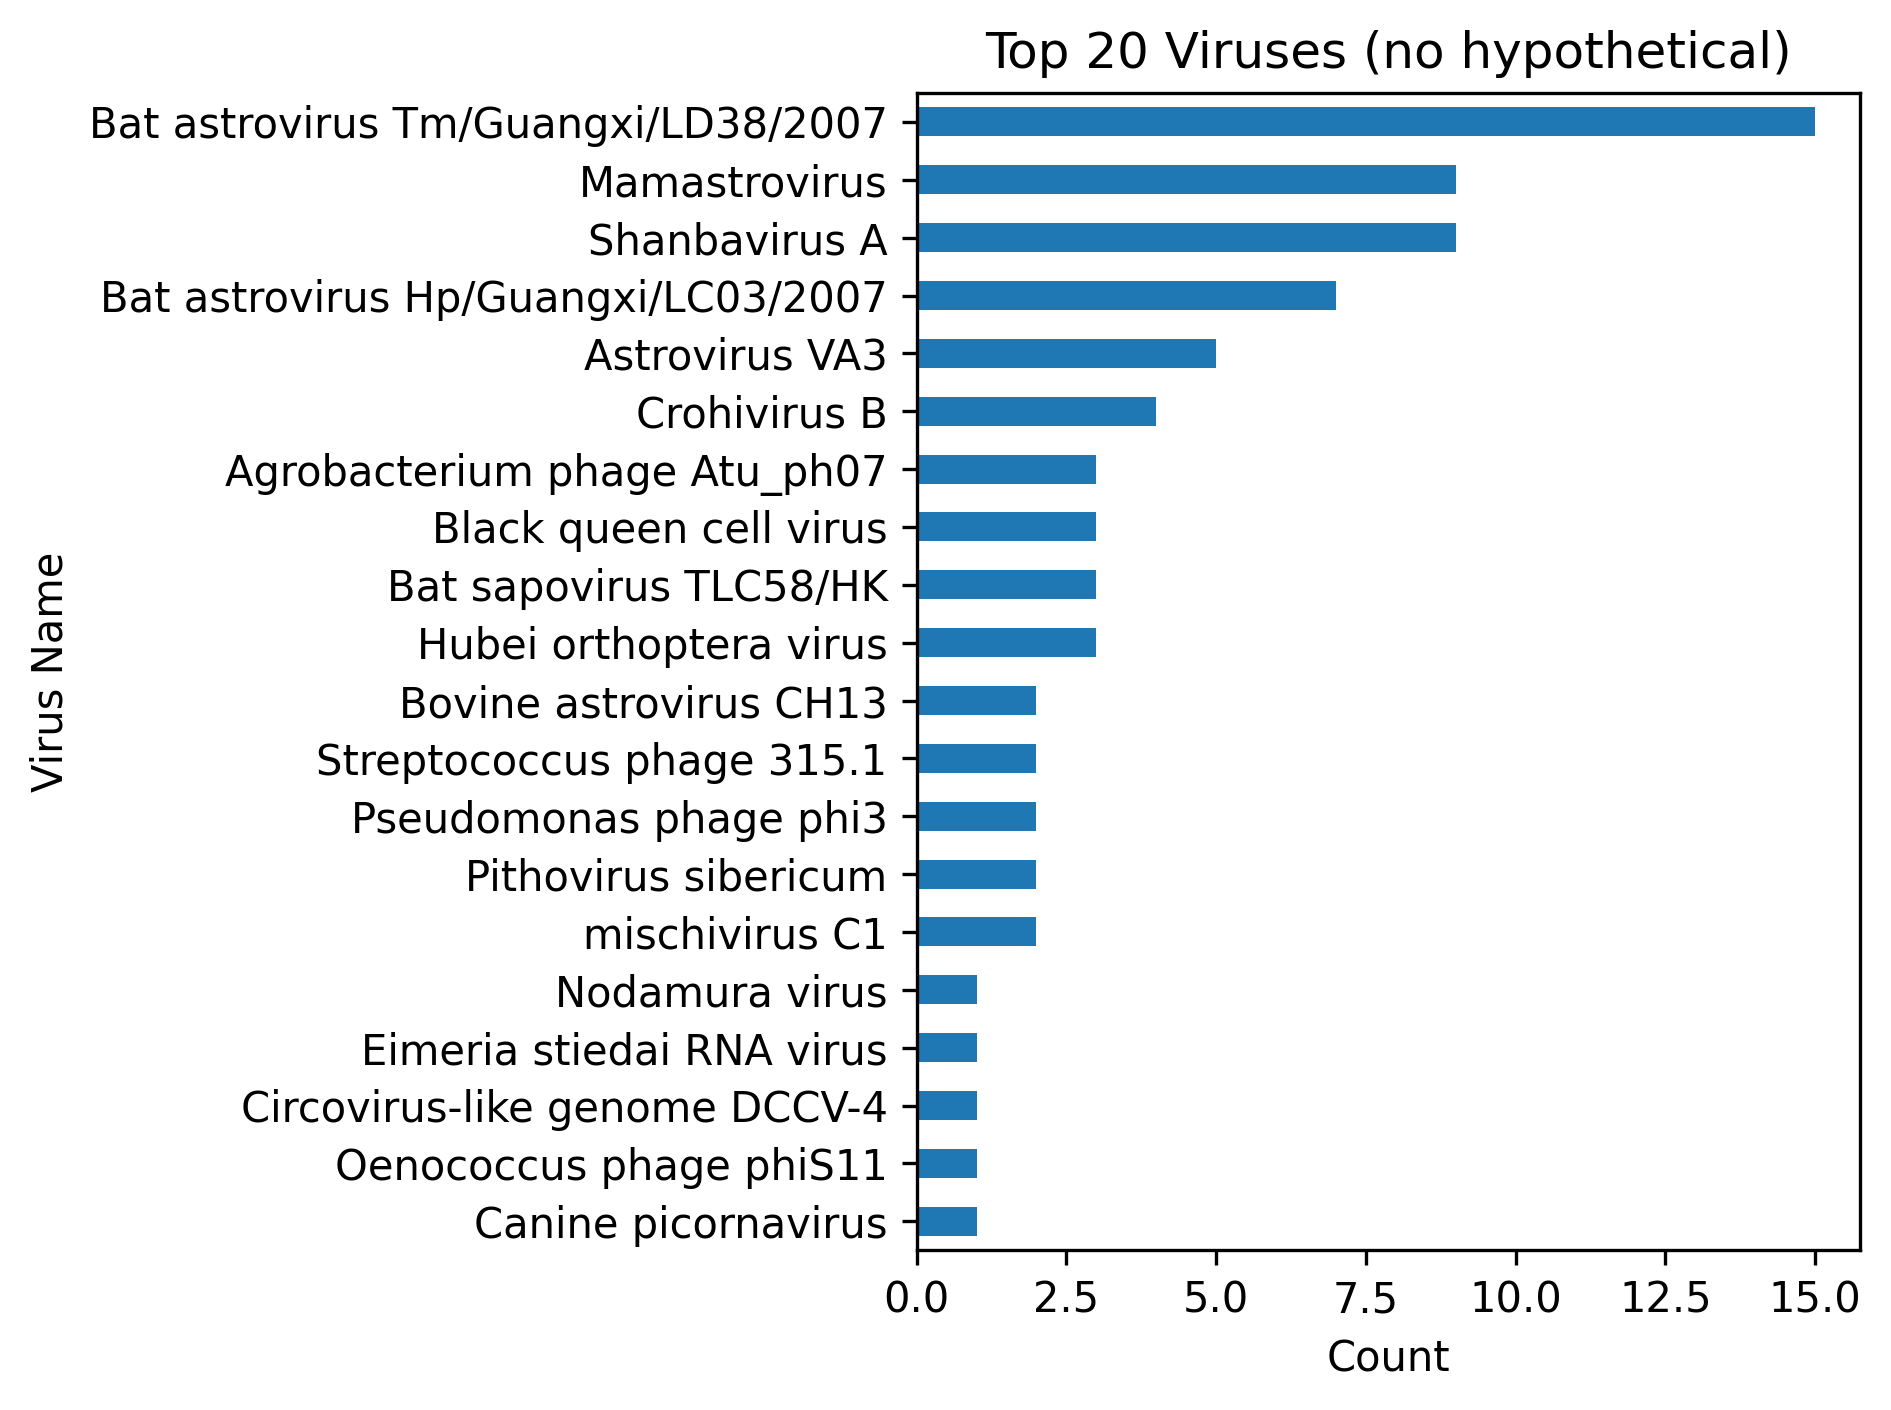

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "../data/diamond_best_hits_third.tsv"

df = pd.read_csv(file_path, sep="\t")


df["score_per_aa"] = df["bitscore"] / df["align_len"]

filtered = df[
    (df["align_len"] > 100) &
    (~df["stitle"].str.contains("hypothetical protein", case=False, na=False))
].copy()

print("Total hits before filtering:", len(df))
print("Total hits after filtering:", len(filtered))



#df["virus_raw"] = df["stitle"].str.extract(r"\[(.*?)\]")

#df["virus_clean"] = df["virus_raw"].str.replace(r"\s+\d+$", "", regex=True)

filtered["virus_raw"] = filtered["stitle"].str.extract(r"\[(.*?)\]")

filtered["virus_clean"] = filtered["virus_raw"].str.replace(r"\s+\d+$", "", regex=True)

virus_counts = (
    filtered["virus_clean"]
    .value_counts()
    .head(20)
)

print("\nTop 20 virus distribution:")
print(virus_counts)

fig = plt.figure(dpi=300)
virus_counts.sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Virus Name")
plt.title("Top 20 Viruses (no hypothetical)")
plt.tight_layout()
plt.show()


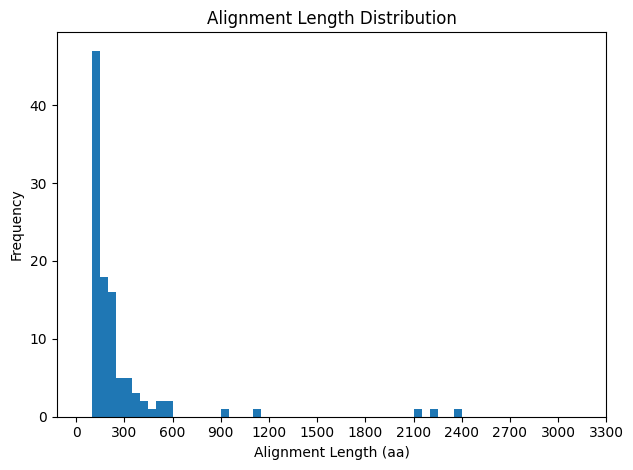

In [18]:
bin_size = 50
max_len = filtered["align_len"].max()
max_limit = 3500
bins = np.arange(0, max_len + bin_size, bin_size)

plt.figure()
plt.hist(filtered["align_len"], bins=bins)
plt.xlabel("Alignment Length (aa)")
plt.ylabel("Frequency")
plt.title("Alignment Length Distribution")
plt.tight_layout()
plt.xticks(np.arange(0, max_limit + 1, 300))
plt.show()


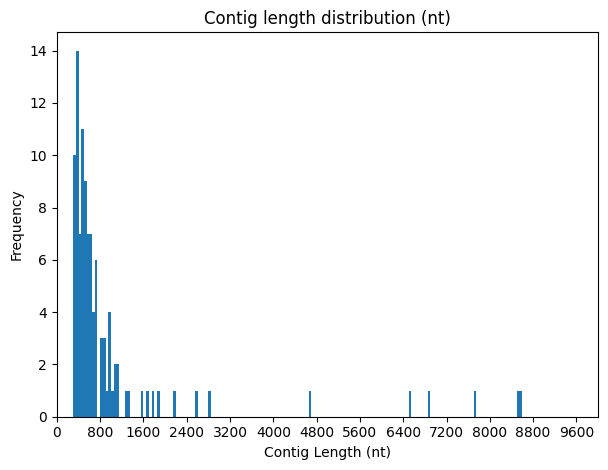

In [19]:
bin_size = 50
max_limit = 10000

lengths = filtered.loc[filtered["qlen"] <= max_limit, "qlen"]

bins = np.arange(0, max_limit + bin_size, bin_size)

plt.figure()
plt.hist(lengths, bins=bins)
plt.xlabel("Contig Length (nt)")
plt.ylabel("Frequency")
plt.title("Contig length distribution (nt)")
plt.xlim(0, max_limit)
plt.tight_layout()
plt.xticks(np.arange(0, max_limit + 1, 800))
plt.show()


In [20]:
# Case-insensitive search
pattern = r"(kobu|astro|calici|parecho)"

subset = df[df["stitle"].str.contains(pattern, case=False, regex=True, na=False)]

print("Total matches for kobu/astro/calici/parecho:", len(subset))

out_path = "diamond_kobu_astro_calici_parecho_matches_second.tsv"
#subset.to_csv(out_path, sep="\t", index=False)

print("Saved to:", out_path)

subset.head(20)


Total matches for kobu/astro/calici/parecho: 45
Saved to: diamond_kobu_astro_calici_parecho_matches_second.tsv


D:\Users\User\AppData\Local\Temp\ipykernel_14296\1222920144.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subset = df[df["stitle"].str.contains(pattern, case=False, regex=True, na=False)]


,qseqid,sseqid,pident,align_len,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen,qcovhsp,scovhsp,stitle,score_per_aa
6,SRR25884743|k141_5470/Astroviridae/1563/15-153...,YP_009505809.1,72.3,506,134,3,53,1555,46,550,6.920000e-261,734.0,1563,800,96.2,63.1,YP_009505809.1 capsid protein precursor [Bat a...,1.450593
7,SRR30851198|k141_33500/Astroviridae/1317/1314-...,YP_009664789.1,68.1,457,126,7,1316,6,115,571,1.850000e-211,607.0,1317,850,99.5,53.8,YP_009664789.1 capsid protein precursor [Mamas...,1.328228
9,SRR30851198|k141_75877/Mamastrovirus/968/12-95...,YP_009664790.1,74.6,319,81,0,10,966,181,499,5.050000e-182,515.0,968,522,98.9,61.1,"YP_009664790.1 non-structural polyprotein 1AB,...",1.614420
15,SRR30851198|k141_15249/Mamastrovirus/725/3-723...,YP_009664785.1,70.5,241,71,0,3,725,1,241,1.430000e-125,359.0,725,274,99.7,88.0,"YP_009664785.1 polyprotein 1AB, partial [Mamas...",1.489627
17,SRR25884743|k141_1830/Astroviridae/523/3-519/2...,YP_009505809.1,87.9,173,21,0,3,521,94,266,1.300000e-107,327.0,523,800,99.2,21.6,YP_009505809.1 capsid protein precursor [Bat a...,1.890173
18,SRR30851198|k141_52163/Mamastrovirus/1868/3-16...,YP_006905858.1,38.2,574,274,16,1,1668,374,884,6.220000e-99,324.0,1868,889,89.3,57.5,YP_006905858.1 ORF1a [Astrovirus VA3],0.564460
20,SRR30851198|k141_303/Mamastrovirus/606/18-603/...,YP_009664787.1,66.2,201,68,0,2,604,536,736,1.350000e-95,298.0,606,816,99.5,24.6,"YP_009664787.1 polyprotein 1AB, partial [Mamas...",1.482587
21,SRR25884743|k141_2916/Mamastrovirus/542/3-537/...,YP_009664790.1,75.6,180,44,0,1,540,54,233,1.860000e-94,286.0,542,522,99.6,34.5,"YP_009664790.1 non-structural polyprotein 1AB,...",1.588889
24,SRR25884743|k141_7223/Astroviridae/414/411-0/1...,YP_009505809.1,92.8,138,10,0,414,1,82,219,6.170000e-85,266.0,414,800,100.0,17.3,YP_009505809.1 capsid protein precursor [Bat a...,1.927536
27,SRR25884743|k141_2363/Astroviridae/485/482-8/1...,YP_009505809.1,72.7,154,38,1,485,24,213,362,6.410000e-75,241.0,485,800,95.3,18.8,YP_009505809.1 capsid protein precursor [Bat a...,1.564935
